In [3]:
# First of all we need to import all the librarys we need to use in the project

import pandas as pd
from bs4 import BeautifulSoup 
import requests
import matplotlib.pyplot as plt

# In this case i cant work with the page so the solution its download the page.html and work with this raw data
f = open('Finetwork KOI - Equipo - Superliga.html', 'r', encoding="UTF8") 
html = f.read() 
f.close()

In [4]:
# Take the raw data and give format that human can understand well
soup = BeautifulSoup(html,'html') 

In [5]:
# Start finding in the data the player containers with the info
display(soup.find_all('div',{'class' : 'players-container-inner'}))

# Now with the player containers take each player and split it
all_players = soup.find_all('a',{'class' : 'player-card'}) 

[<div class="players-container-inner"> <a class="player-card" href="https://superliga.lvp.global/jugador/sinmivak"> <!-- PLAYER --><div class="squad-player-container"><div class="upper-player-card"><div class="photo"> <img alt="" class="player-image" src="Finetwork%20KOI%20-%20Equipo%20-%20Superliga_files/6467481d75e8c816090991.x2.png"/></div><div class="upper-player-info-container"><div class="flag-image-container"> <img alt="Player flag nationality" class="flag-image" src="Finetwork%20KOI%20-%20Equipo%20-%20Superliga_files/PL.png"/></div><h3><span class="player-nickname">Sinmivak</span></h3><h4><span class="player-name">Jakub Rucki</span></h4><h4><span class="player-position">TOP</span></h4></div></div><div class="bottom-player-card"><div class="stats-container"> <img alt="Best player champion image." src="Finetwork%20KOI%20-%20Equipo%20-%20Superliga_files/Sion.png" title="Sion"/> <img alt="Best player champion image." src="Finetwork%20KOI%20-%20Equipo%20-%20Superliga_files/Renekton.

In [6]:
 # We need to do a list for each data type to then create the dataframe
stats_all = []
player_name_all = []
player_position = []

# I decided to do only a one for lop insted a list comprension because i can use for each one of the list i need
for player in all_players[:5]:
    stats_all.append(player.find('span', {'class':'stats-player'}))
    player_name_all.append(player.find('span', {'class':'player-nickname'}).text) 
    player_position.append(player.find('span', {'class':'player-position'}).text)



In [7]:
# We have a problem because we are geting 2 datas in same list so need slpit them
stats_all[0].text.replace('-','').replace('KDA','').strip().split() 

# There is the lop to clean the data
i = 0
for player in stats_all: 
    stats_all[i] = player.text.replace('-','').replace('KDA','').strip().split()
    i += 1

In [8]:
# And here is the for lop to split all the data in diferent list
stats_stats = []
stats_kda = [] 

for element in stats_all:
    stats_stats.extend(element[:1])
    stats_kda.extend(element[1:])
    


In [9]:
# And in the end we create the final list that we gona use to create the dataframe
all_players_info = list(zip(player_name_all,player_position,stats_stats,stats_kda))

In [10]:
# Puting the headers for the columns
headers = ['nickname','position','stats','k/d/a'] 

# Creating the final dataframe
df1 = pd.DataFrame(all_players_info, columns=headers)

,nickname,position,stats,k/d/a
0,Sinmivak,TOP,45/35/111,"4,5"
1,Koldo,JUNGLER,39/46/185,"4,9"
2,Baca,MID,87/50/131,"4,4"
3,Jopa,ADC,111/58/113,"3,9"
4,Stend,SUPPORT,22/53/218,"4,5"


In [ ]:
# Obtain statistics of played champions
played_champions = soup.find("div", class_="maps-graph col-md-4")
played_champions_list = played_champions.find_all("div", class_="map-graph-item")

# Obtain statistics of banned champions
banned_champions = soup.find("div", class_="weapons-graph stats-title col-md-4")
banned_champions_list = banned_champions.find_all("div", class_="map-graph-item")

In [106]:
# Create lists for the data
played_champions_data = []
banned_champions_data = []

# Extract data of played champions
for item in played_champions_list:
    champion_name = item.find(class_="map-graph-name").text.strip()
    games_played = int(item.find(class_="map-graph-win-rate").text.strip().split('/')[1].strip())
    games_won = int(item.find(class_="map-graph-win-rate").text.strip().split('/')[0].strip())
    played_champions_data.append((champion_name, games_played, games_won))

# Extract data of banned champions
for item in banned_champions_list:
    champion_name = item.find(class_="map-graph-name").text.strip()
    games_played = int(item.find(class_="map-graph-win-rate").text.strip().split('/')[1].strip())
    games_won = int(item.find(class_="map-graph-win-rate").text.strip().split('/')[0].strip())
    banned_champions_data.append((champion_name, games_played, games_won))

# Create DataFrames with the data
headers = ["Champ", "Played", "Won"]
df_played_champions = pd.DataFrame(played_champions_data, columns=headers)
df_banned_champions = pd.DataFrame(banned_champions_data, columns=headers)

# Print DataFrames
print("Champs played:")
display(df_played_champions)
print("\nChamps banned:")
display(df_banned_champions)

Champs played:


,Champ,Played,Won
0,Renekton,4,4
1,Sejuani,4,3
2,Alistar,4,3
3,Syndra,4,2
4,Neeko,4,1
5,Jinx,4,1



Champs banned:


,Champ,Played,Won
0,Poppy,4,4
1,Braum,4,3
2,Neeko,4,3
3,Rell,4,3
4,Tristana,4,1
5,Lee Sin,4,1


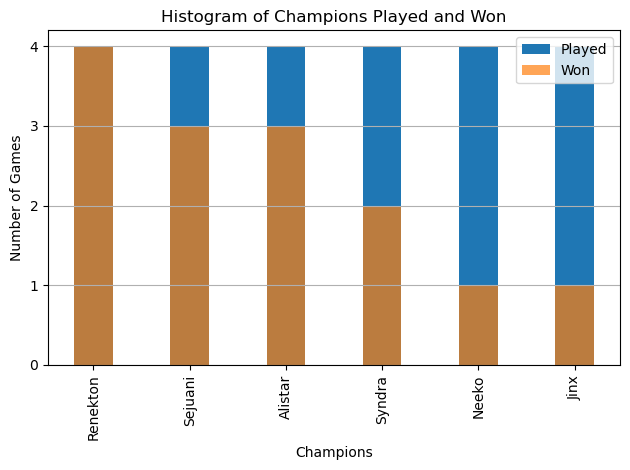

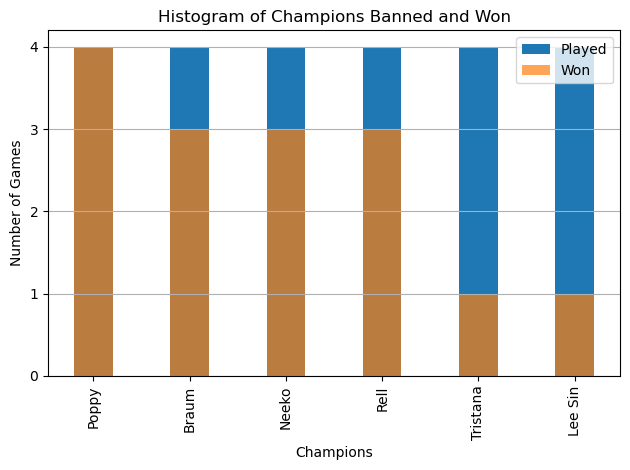

In [108]:
# Histograms configuration
bar_width = 0.4

# Create histogram for played champions
fig, ax = plt.subplots()
ax.bar(df_played_champions.index, df_played_champions["Played"], width=bar_width, label="Played")
ax.bar(df_played_champions.index, df_played_champions["Won"], width=bar_width, alpha=0.7, label="Won")
ax.set_xticks(df_played_champions.index)
ax.set_xticklabels(df_played_champions["Champ"], rotation=90)
ax.set_xlabel("Champions")
ax.set_ylabel("Number of Games")
ax.legend()
plt.title("Histogram of Champions Played and Won")

# Adding y-axis grid
ax.yaxis.grid(True)

# Set integer values on the y-axis
plt.locator_params(axis="y", integer=True)

# Function automatically adjusts the figure layout to avoid overlapping and ensure that elements are displayed properly
plt.tight_layout()
plt.show()

# Create histogram for banned champions
fig, ax = plt.subplots()
ax.bar(df_banned_champions.index, df_banned_champions["Played"], width=bar_width, label="Played")
ax.bar(df_banned_champions.index, df_banned_champions["Won"], width=bar_width, alpha=0.7, label="Won")
ax.set_xticks(df_banned_champions.index)
ax.set_xticklabels(df_banned_champions["Champ"], rotation=90)
ax.set_xlabel("Champions")
ax.set_ylabel("Number of Games")
ax.legend()
plt.title("Histogram of Champions Banned and Won")

# Adding y-axis grid
ax.yaxis.grid(True)

# Set integer values on the y-axis
plt.locator_params(axis="y", integer=True)

# Function automatically adjusts the figure layout to avoid overlapping and ensure that elements are displayed properly
plt.tight_layout()
plt.show()